# Importing the necessary Libraries

In [1]:
import pandas as pd
from itertools import product

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence


from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_squared_error ,r2_score

from sklearn.model_selection import cross_val_score

# Loading the Data

In [2]:
# train_data_path = "D:\\Edge_downloads\\MaterialStrength_Train.csv"
# test_data_path = "D:\\Edge_downloads\\MaterialStrength_Test.csv"

# Accessing the raw files from the web
train_data_path = "https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_Train.csv"
test_data_path = "https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_test.csv"

In [3]:
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
train_data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270,55.16


 We can see that there are 800 observations in the training data set and 8 features column which feature columns (which we will look into more in great detail afterwards)

In [4]:
test_data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,material_strength
0,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,7,NaN
1,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,NaN
2,339.0,0.0,0.0,185.0,0.0,1060.0,754.0,28,NaN
3,393.0,0.0,0.0,192.0,0.0,940.0,758.0,3,NaN
4,393.0,0.0,0.0,192.0,0.0,940.0,758.0,28,NaN
...,...,...,...,...,...,...,...,...,...
225,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,NaN
226,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,NaN
227,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,NaN
228,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,NaN


We can see there are 230 observations in the test data and the last column is empty.
it's a ~0.77 and ~0.22 split in the whole train and the test data

### As we can already see the is no ytrue column added in the test csv file, So we have to make separate validation set in later stage to hypertune our model

# Checking out the Data

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    int64  
 8   Material Strength   800 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 56.4 KB


In [6]:
train_data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,292.533625,67.819125,47.81125,179.77925,5.693500,985.551875,778.426250,49.69625,36.654187
std,103.719988,86.017377,61.53907,22.18845,6.264438,72.783248,82.670454,69.13960,17.623053
min,102.000000,0.000000,0.00000,121.80000,0.000000,801.000000,594.000000,1.00000,2.330000
25%,212.100000,0.000000,0.00000,162.00000,0.000000,938.000000,746.600000,7.00000,23.242500
50%,277.050000,19.000000,0.00000,184.00000,5.250000,974.000000,780.650000,28.00000,35.340000
75%,374.000000,129.800000,117.50000,192.00000,10.200000,1046.925000,839.525000,56.00000,48.880000
max,540.000000,359.400000,174.70000,228.00000,32.200000,1145.000000,992.600000,365.00000,82.600000


Count -> actually shows no of non-null values in a particular column and here every column is non-null actuallly. All have 800 data points which is precisley the no of the training example

Mean - > Gives the mean of each column

Standard Deviation (std) - > Standard deviation measures the variation/dispresion in the dataset. We can easily see that the **cement** column has high variability

Minimum/ Maximum - >  smallest/biggest value of each column

25% - > The point below which 25% of data lies. The remaining all are the Same.

So we can see that **75%** of data fallen under **48.880000 material strength**

# Data Preprocessing and EDA

### Checking for missing data

In [7]:
train_data.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
Material Strength     0
dtype: int64

In [8]:
test_data.isnull().sum()

cement                  0
blast_furnace_slag      0
fly_ash                 0
water                   0
superplasticizer        0
coarse_aggregate        0
fine_aggregate          0
age                     0
material_strength     230
dtype: int64

##### Conclusion -> There is no missing data in the train or the test set

##### Refenerce -> https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=Au-PXCPswt5s

### Chechking the distribution of data

In [9]:
columns = train_data.columns
columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength'],
      dtype='object')

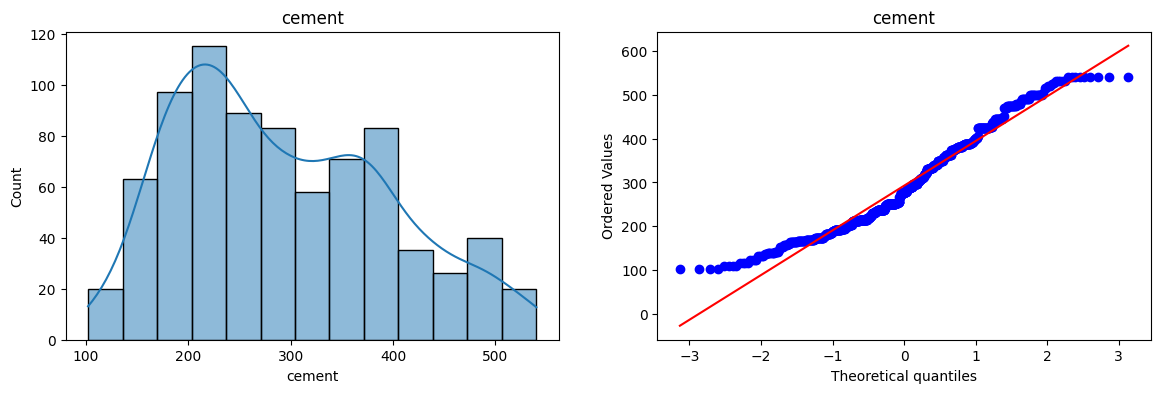

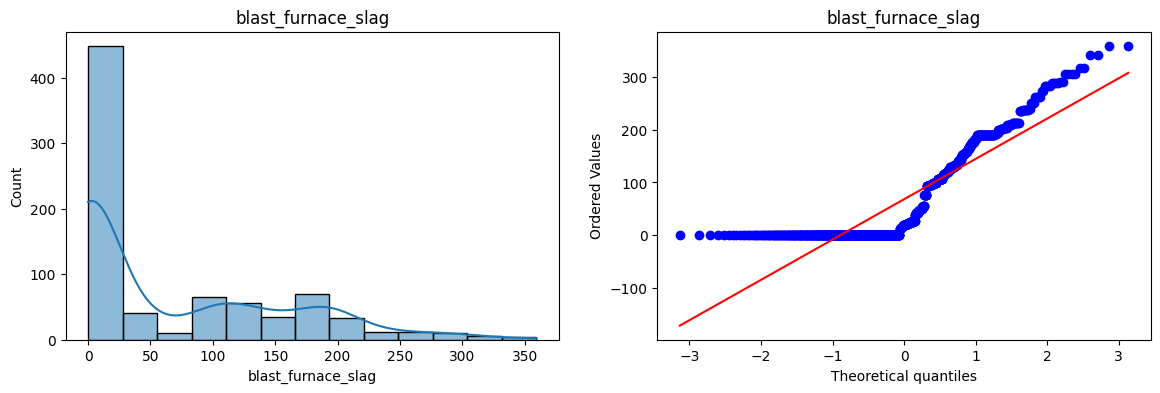

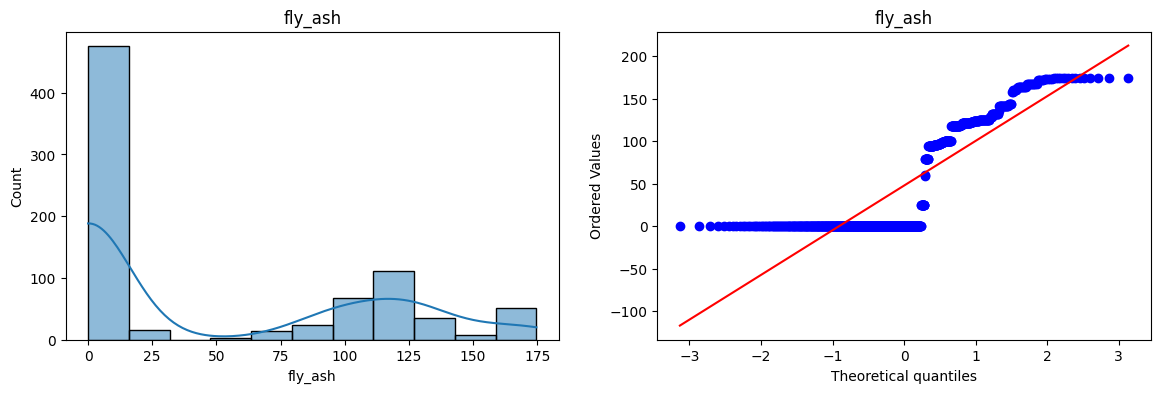

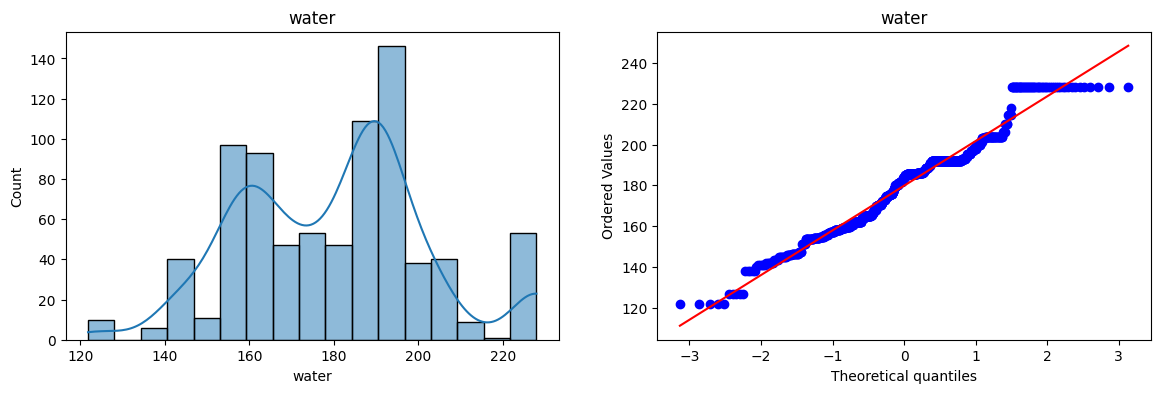

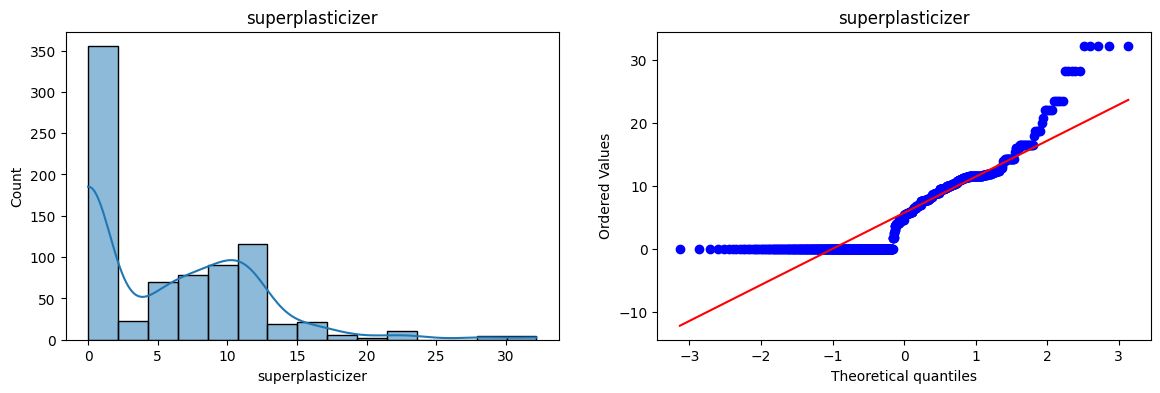

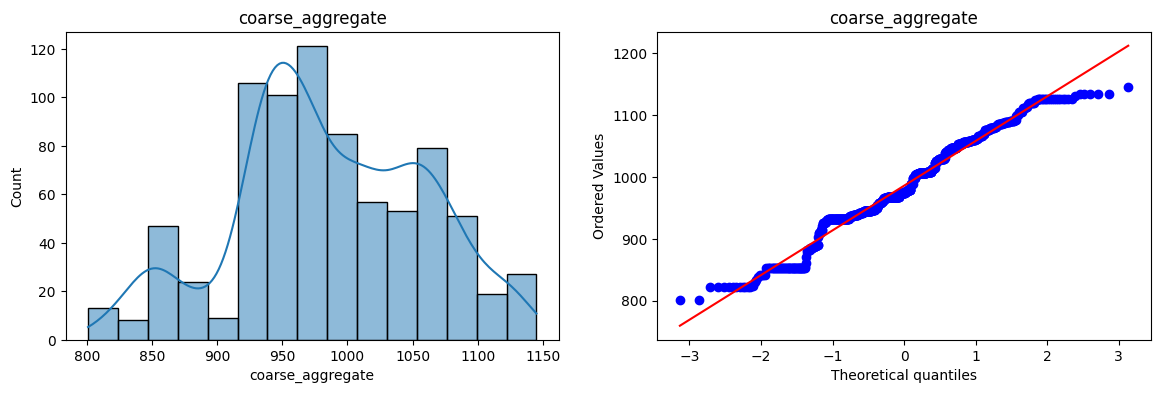

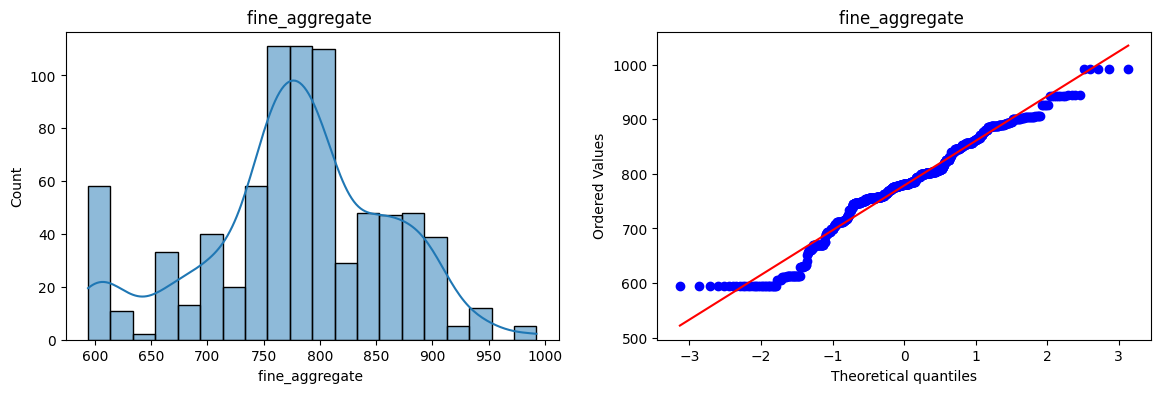

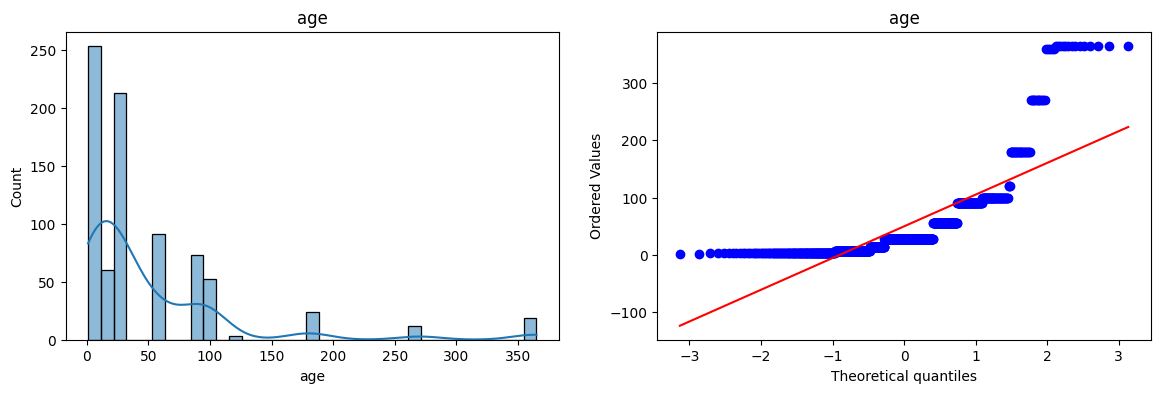

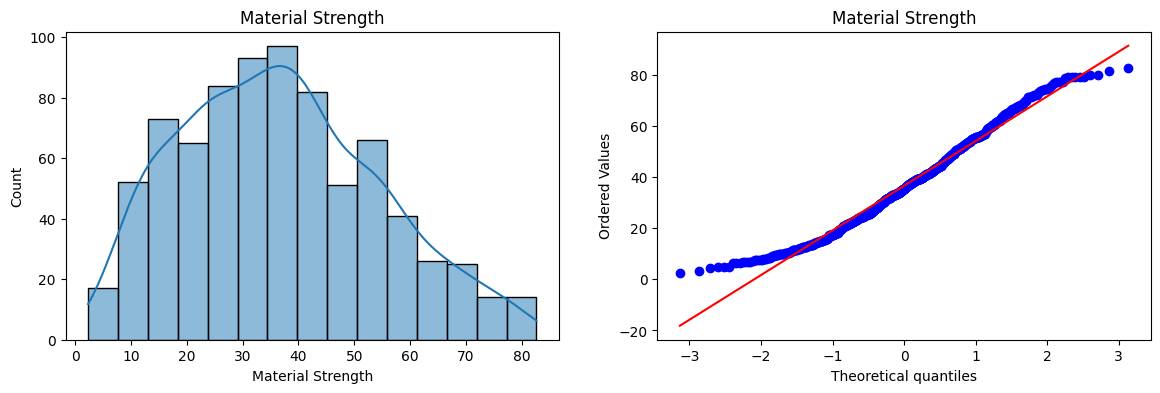

In [10]:
for x in columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(train_data[x],kde=True)
    plt.title(x)

    plt.subplot(122)
    stats.probplot(train_data[x],dist = 'norm' ,plot=plt)
    plt.title(x)
    
    plt.show()

##### Observation - we can see that here cement , fine_aggregate , and our target column is a bit normally distributed, other than these all different distributions all along

##### Reference - https://www.youtube.com/playlist?list=PLKnIA16_RmvYXWH_E6PuVLLHHTWXwwDN7

### Outlier Detection ( 3 Sigma Rule )

In [11]:
mean_fine_aggregrate = train_data['fine_aggregate '].mean()
std_fine_aggregrate = train_data['fine_aggregate '].std()
print(f"mean and std of fine_aggregate {mean_fine_aggregrate} , {std_fine_aggregrate}")

mean and std of fine_aggregate 778.42625 , 82.67045431082039


In [12]:
upper_lim_fine_aggregate = mean_fine_aggregrate + 3*std_fine_aggregrate
lower_lim_fine_aggregate = mean_fine_aggregrate - 3*std_fine_aggregrate

print(f"upper lim : {upper_lim_fine_aggregate} and lower limit {lower_lim_fine_aggregate}")

upper lim : 1026.4376129324612 and lower limit 530.4148870675388


In [13]:
train_data[(train_data['fine_aggregate ']>upper_lim_fine_aggregate) | (train_data['fine_aggregate ']<lower_lim_fine_aggregate)]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength


##### So, no outliers here
#### Now let's do the outlier detection for the rest of the columns which are not so normally distributed

In [14]:
non_normal_cols = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'age']

cement has 0.4569652200722188 skew


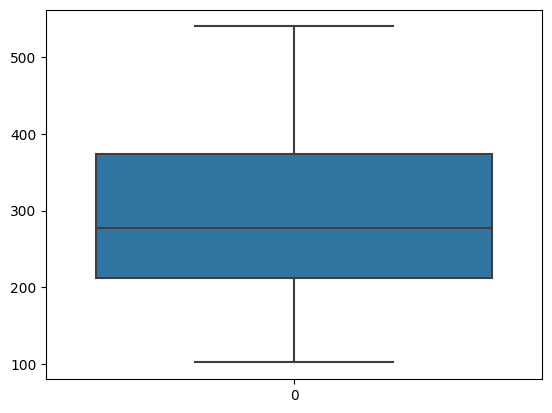

blast_furnace_slag has 1.0353913714488967 skew


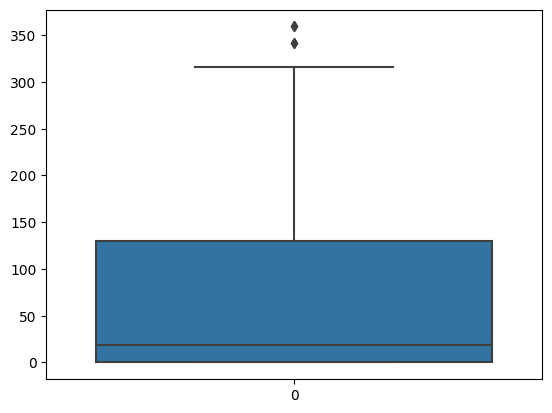

fly_ash has 0.6804282264985926 skew


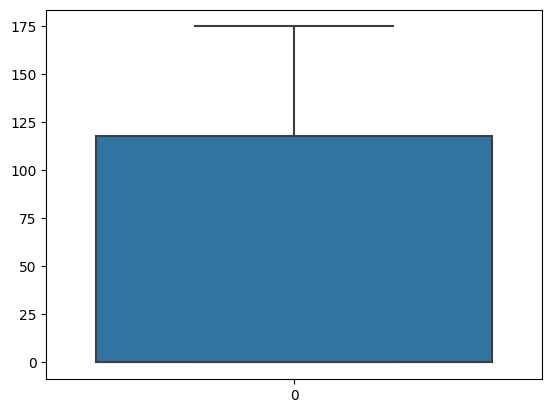

water has 0.1542373190107049 skew


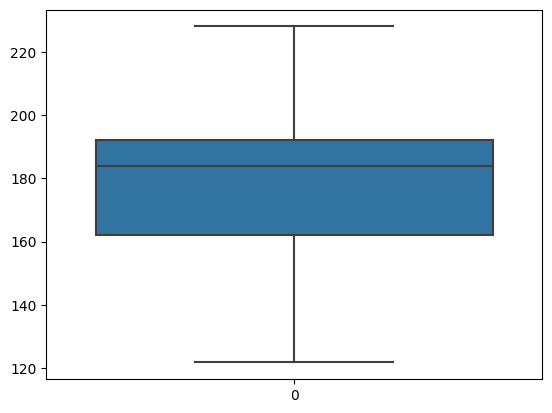

superplasticizer has 1.1247310964336916 skew


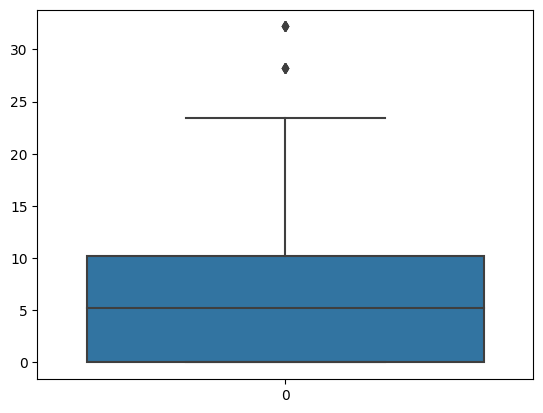

coarse_aggregate has -0.10952994428770768 skew


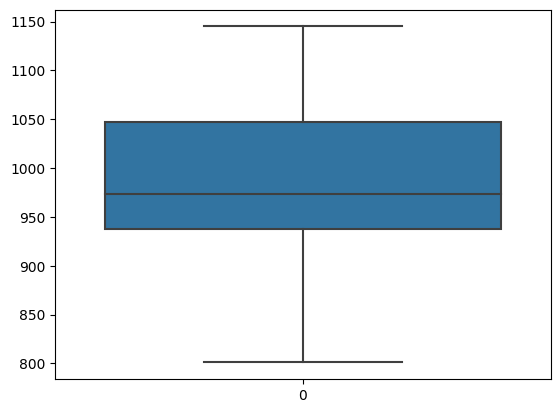

age has 2.863947437281313 skew


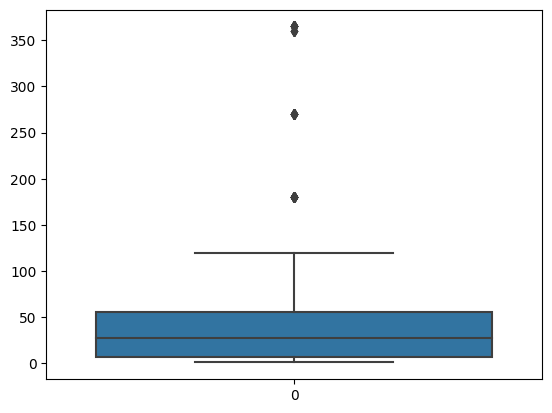

In [15]:
for x in non_normal_cols:
    print(f"{x} has {train_data[x].skew()} skew")
    plt.figure()
    sns.boxplot(train_data[x])
    plt.show()

In [16]:
def outliers_3sigma(col):
    per_25_bfs = train_data[col].quantile(0.25)
    per_75_bfs = train_data[col].quantile(0.75)

    print(per_25_bfs)
    print(per_75_bfs)

    iqr_bfs = per_75_bfs - per_25_bfs
    print(f"iqr_{col} = {iqr_bfs}")

    upper_limit = per_75_bfs + 1.5*iqr_bfs
    lower_limit = per_25_bfs - 1.5*iqr_bfs
    print(f"upper limit of {col} {upper_limit}")
    print(f"lower limit of {col} {lower_limit}")
    
    return upper_limit , lower_limit

###### choosing only [age , superplasticizer , blast_furnace_slag] because using box plot we can see that only these three columns can have potential outliers

In [17]:
upper_limit_bfs , lower_limit_bfs = outliers_3sigma('blast_furnace_slag')
upper_limit_superplasticizer , lower_limit_superplasticizer = outliers_3sigma('superplasticizer')
upper_limit_age , lower_limit_age = outliers_3sigma('age')

0.0
129.8
iqr_blast_furnace_slag = 129.8
upper limit of blast_furnace_slag 324.5
lower limit of blast_furnace_slag -194.70000000000002
0.0
10.2
iqr_superplasticizer = 10.2
upper limit of superplasticizer 25.5
lower limit of superplasticizer -15.299999999999999
7.0
56.0
iqr_age = 49.0
upper limit of age 129.5
lower limit of age -66.5


In [18]:
train_data[train_data['blast_furnace_slag']>upper_limit_bfs]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
571,228.0,342.1,0.0,185.7,0.0,955.8,674.3,28,39.70
584,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.92


In [19]:
train_data[train_data['superplasticizer']<lower_limit_superplasticizer]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength


In [20]:
train_data[train_data['superplasticizer']>upper_limit_superplasticizer]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


In [21]:
train_data[train_data['age']>upper_limit_age]


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


##### Observation - There are a lot of outliers , specially in the age column, but i wanna treat them as an valid data point as the give the dataset a variance

##### Reference - https://www.youtube.com/playlist?list=PLKnIA16_RmvYXWH_E6PuVLLHHTWXwwDN7

## Split into Datasets

In [22]:
X = train_data.drop("Material Strength",axis=1)
y = train_data["Material Strength"]

X_test =  test_data.drop("material_strength",axis=1)


In [23]:
X_train , X_val , y_train,y_val = train_test_split(X,y,test_size=0.1,random_state=42)

In [24]:
print(X_train.shape)
print(X_val.shape)

(720, 8)
(80, 8)


In [25]:
X_train.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,293.104444,67.877639,48.081389,179.564028,5.766389,984.905556,778.917917,47.161111
std,104.350838,85.934826,61.779465,22.027816,6.292284,73.427604,82.457477,63.758185
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,212.500000,0.000000,0.000000,162.000000,0.000000,938.000000,746.600000,7.000000
50%,277.050000,19.000000,0.000000,183.800000,5.300000,974.000000,780.600000,28.000000
75%,375.000000,129.825000,118.200000,192.000000,10.125000,1046.925000,840.500000,56.000000
max,540.000000,359.400000,174.700000,228.000000,32.200000,1134.300000,992.600000,365.000000


### Correlation Chechking

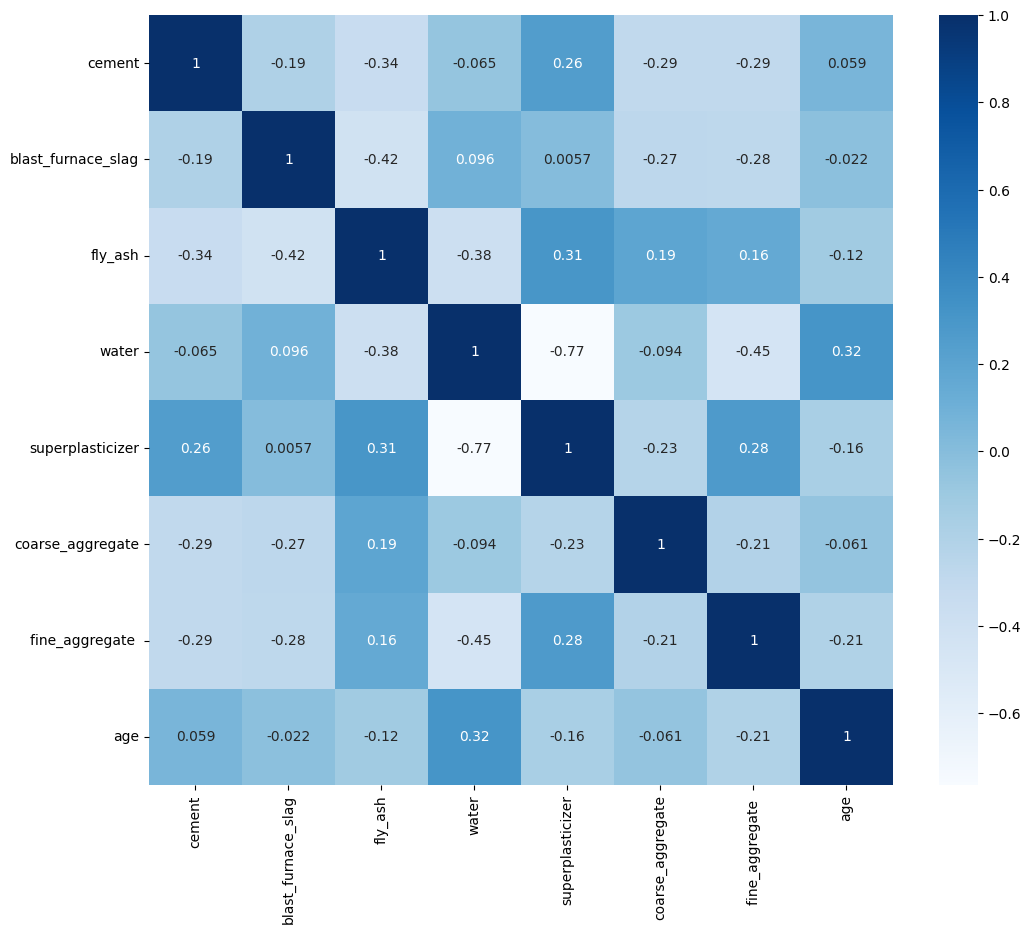

In [26]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True , cmap=plt.cm.Blues)
plt.show()

In [27]:
def correlation(df,threshold):
    col_corr = set()
    corr_matrix = df.corr()
    
    for i in range(corr_matrix.shape[0]):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                col = corr_matrix.columns[i]
                col_corr.add(col)
    return col_corr

In [28]:
corr_features = correlation(X_train,0.5)
corr_features

set()

##### Observation - we can see none of the column is actually corelated with each other more than 0.5, so they are more or less independent

##### Reference - https://www.youtube.com/watch?v=FndwYNcVe0U&t=671s

### Applying feature scaling ot the train and test sets

In [29]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled =  scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns =  X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_train.columns)

In [30]:
np.round(X_train_scaled.describe())

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
count,720.0,720.0,720.0,720.0,720.0,720.0,720.0,720.0
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-1.0,-1.0,-3.0,-1.0,-3.0,-2.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0
50%,-0.0,-1.0,-1.0,0.0,-0.0,-0.0,0.0,-0.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
max,2.0,3.0,2.0,2.0,4.0,2.0,3.0,5.0


##### Reference - https://colab.research.google.com/github/ageron/handson-ml3/blob/main/02_end_to_end_machine_learning_project.ipynb#scrollTo=Au-PXCPswt5s

### Applying transformation on the Data

##### Before Transformation

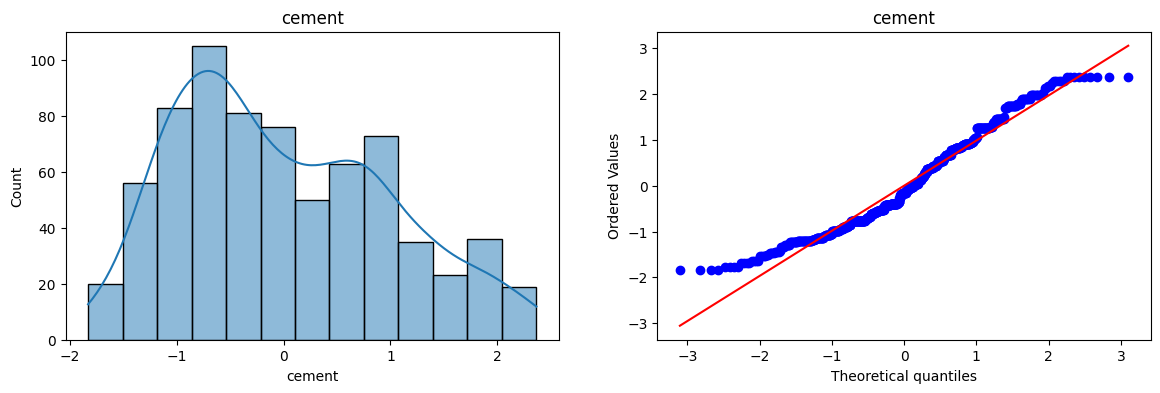

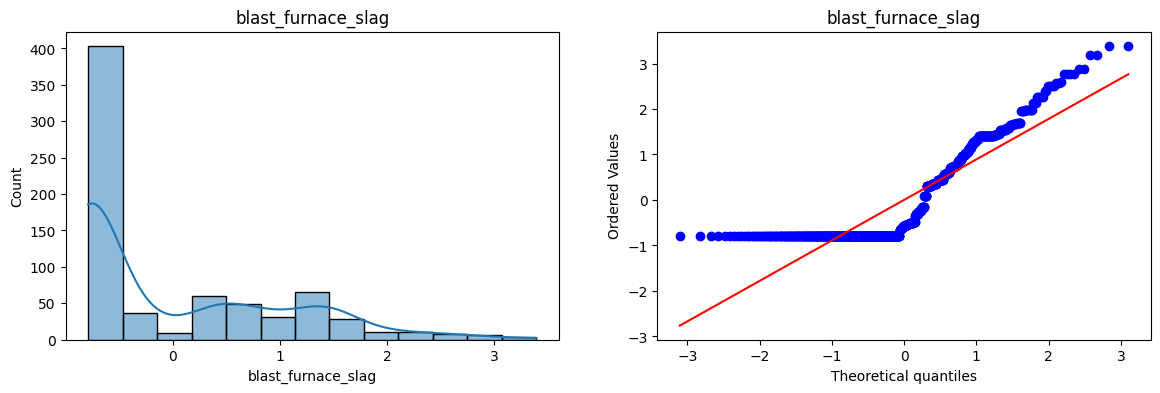

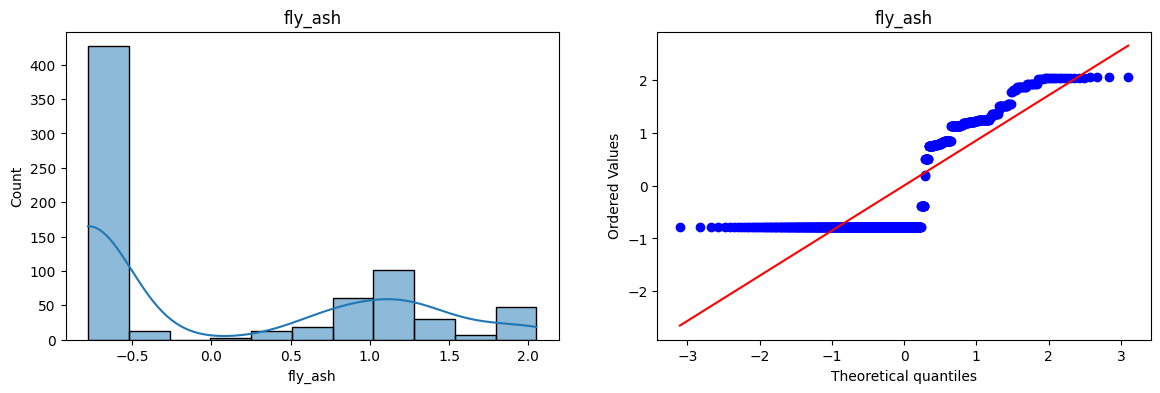

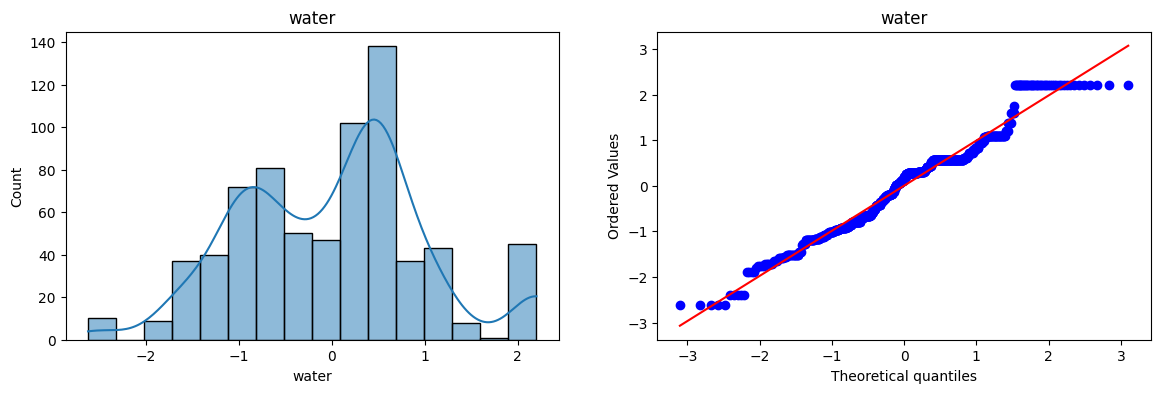

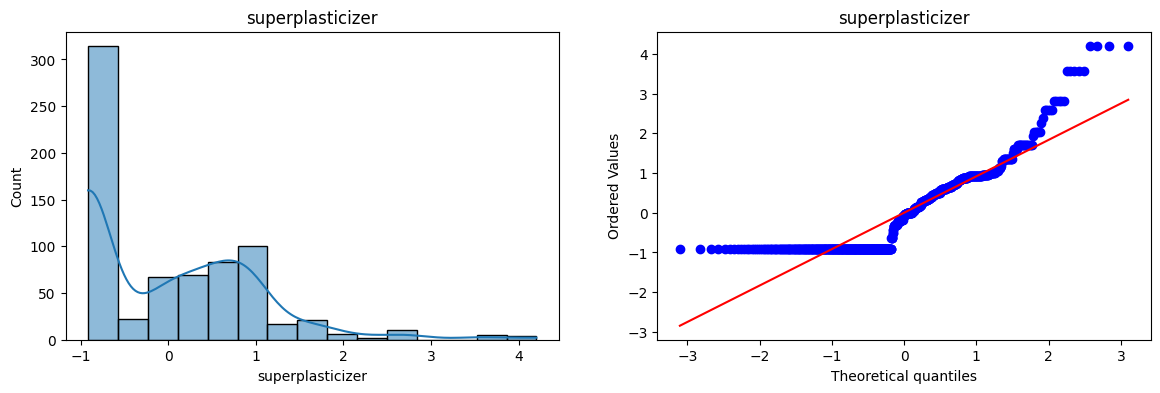

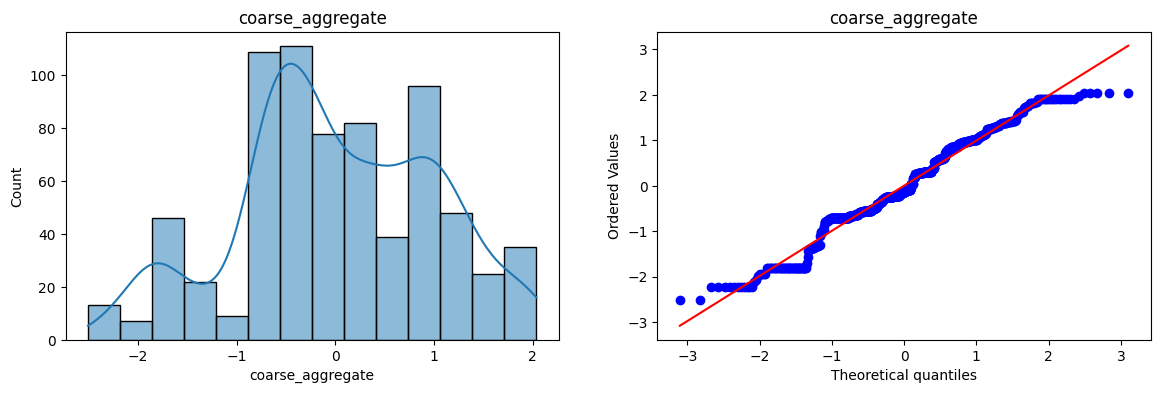

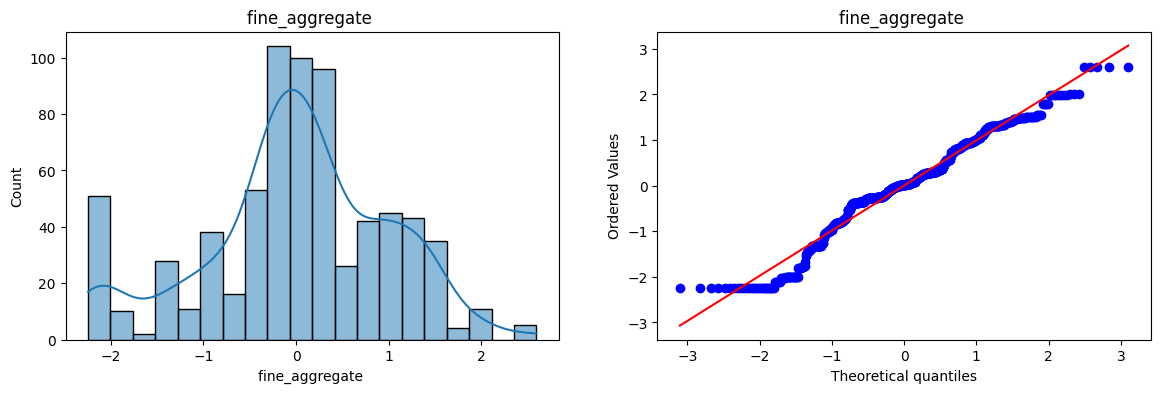

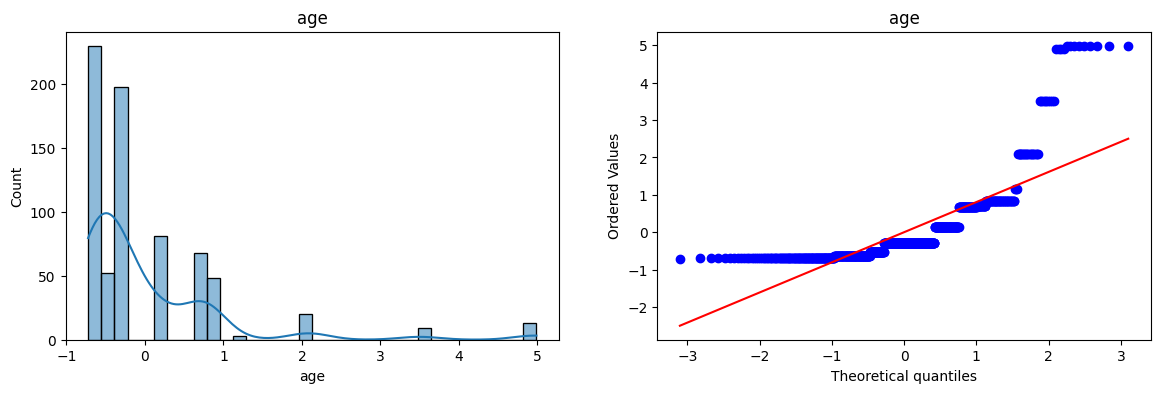

In [31]:
for x in X_train_scaled.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train_scaled[x],kde=True)
    plt.title(x)

    plt.subplot(122)
    stats.probplot(X_train_scaled[x],dist = 'norm' ,plot=plt)
    plt.title(x)
    
    plt.show()
    
    
    

##### After transformation

In [32]:
pt = PowerTransformer()

In [33]:
X_train_scaled_transformed = pt.fit_transform(X_train_scaled)
X_val_scaled_transformed = pt.transform(X_val_scaled)
X_test_scaled_transformed = pt.transform(X_test_scaled)

X_train_scaled_transformed = pd.DataFrame(X_train_scaled_transformed, columns = X_train.columns)
X_val_scaled_transformed = pd.DataFrame(X_val_scaled_transformed, columns =  X_val.columns)
X_test_scaled_transformed = pd.DataFrame(X_test_scaled_transformed,columns= X_test.columns)

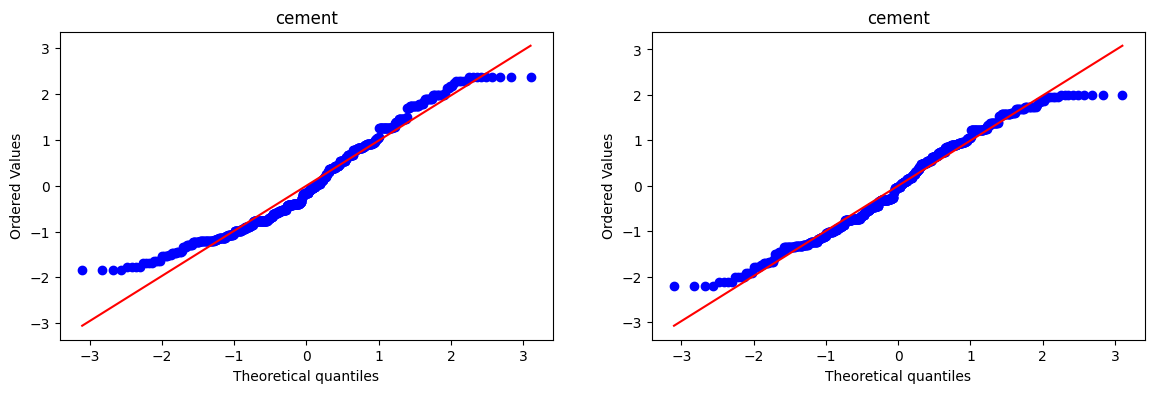

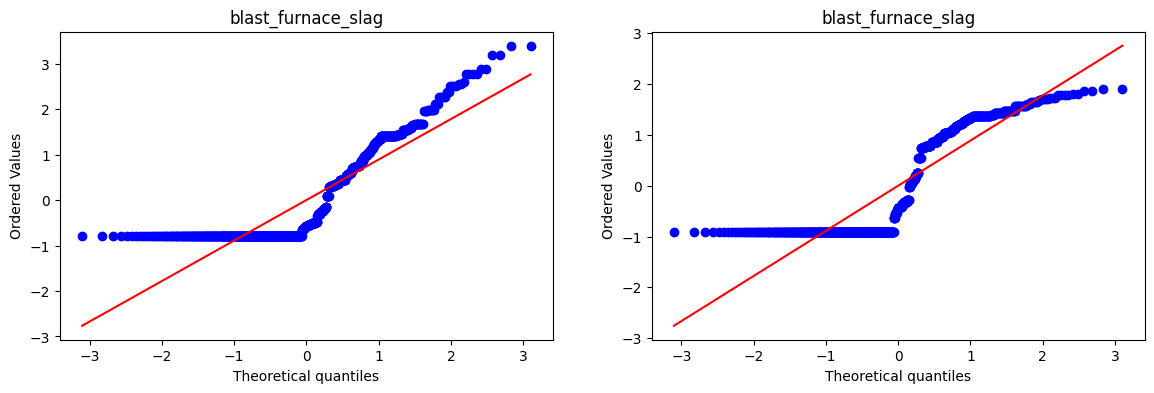

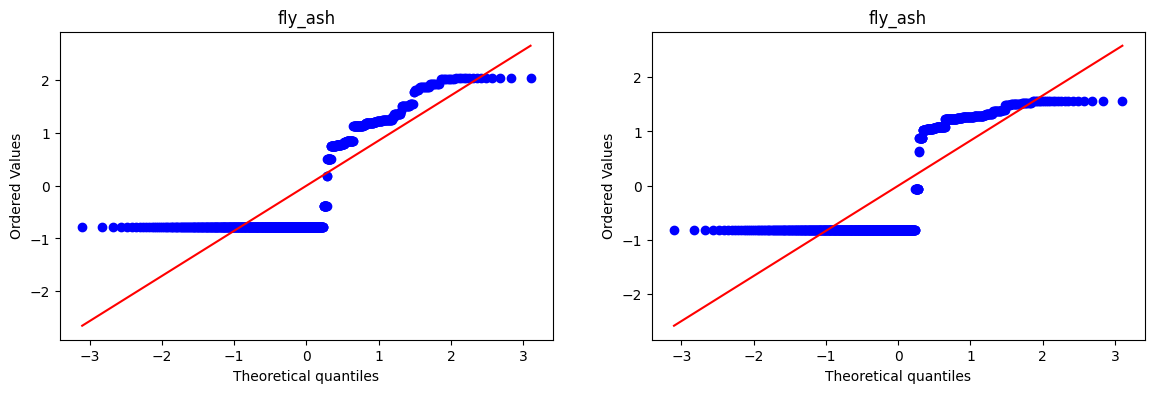

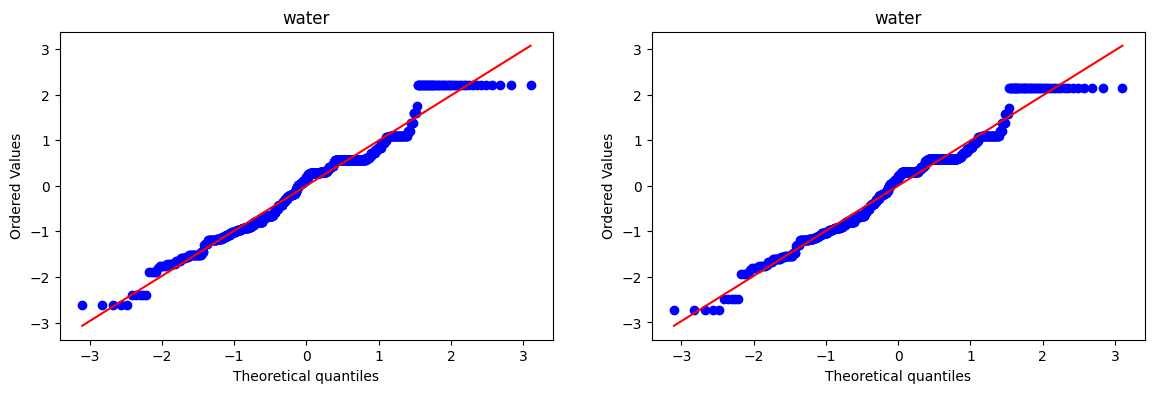

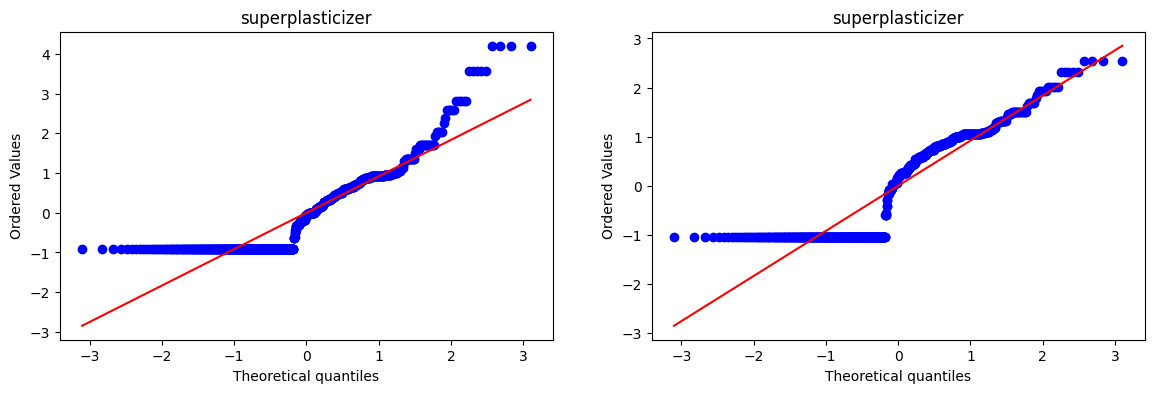

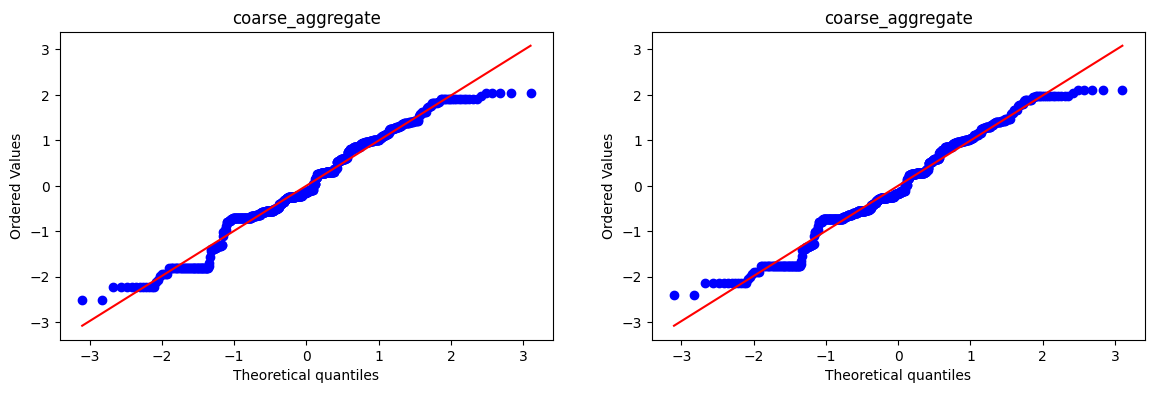

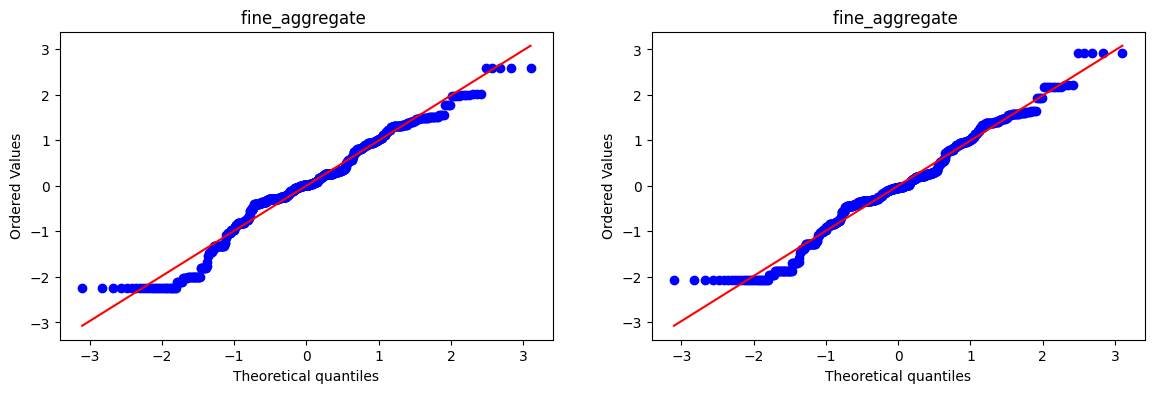

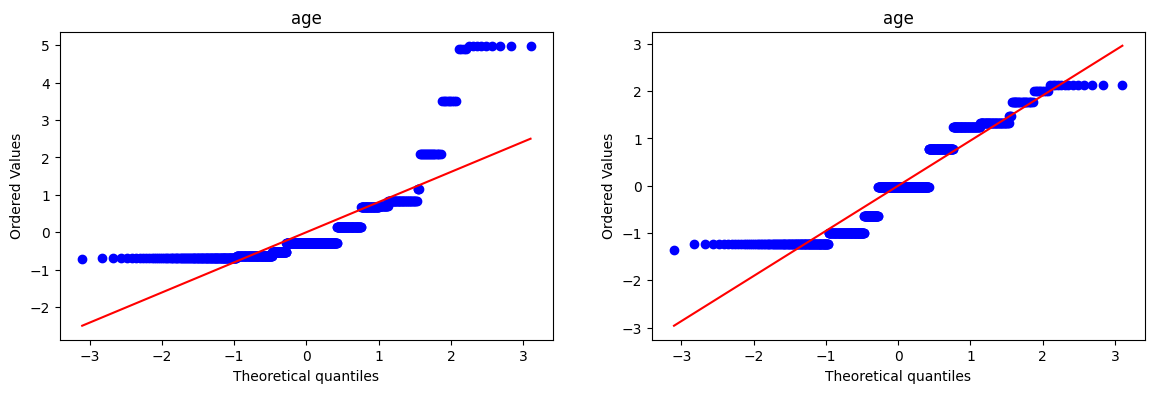

In [34]:
for x in X_train_scaled.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_train_scaled[x],dist ='norm',plot=plt)
    plt.title(x)

    plt.subplot(122)
    stats.probplot(X_train_scaled_transformed[x],dist = 'norm' ,plot=plt)
    plt.title(x)
    
    plt.show()

#### Cheking on Validation set

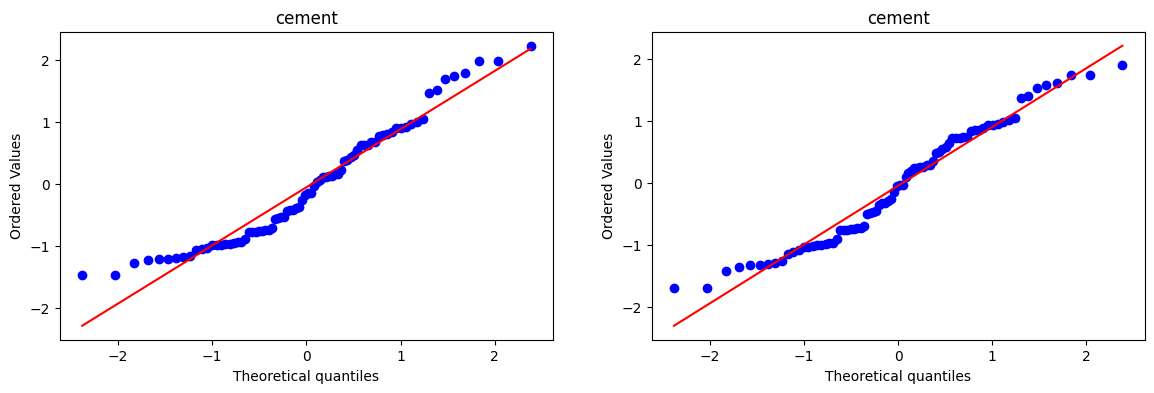

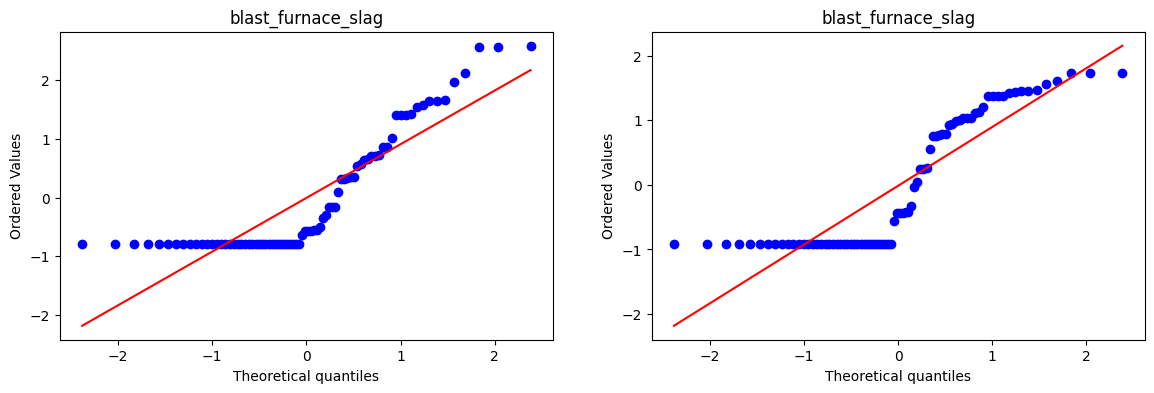

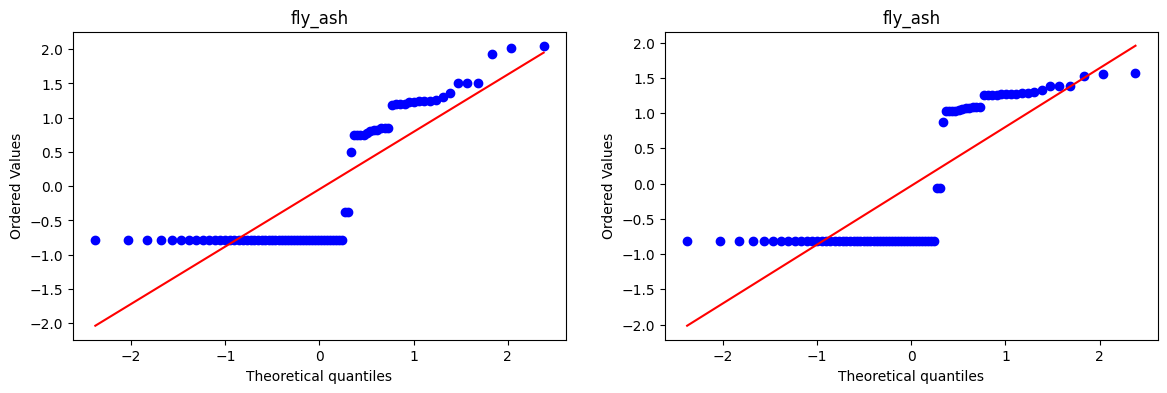

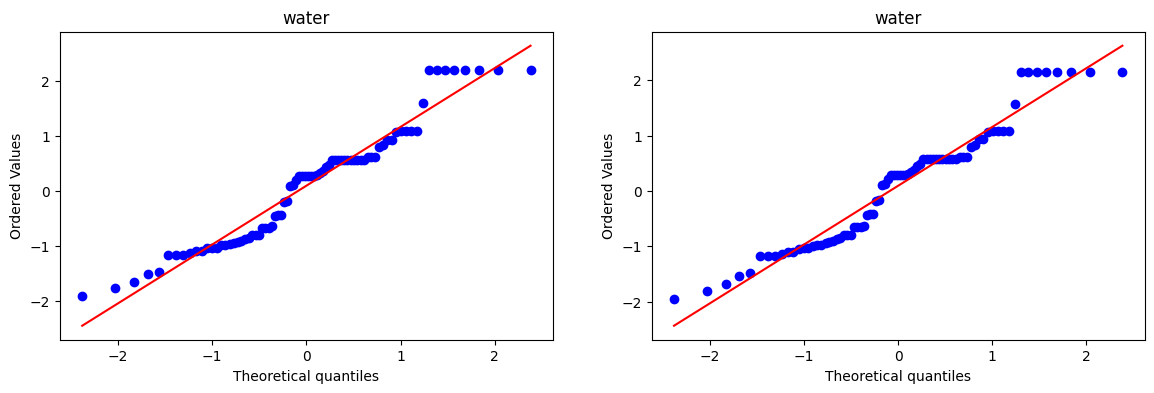

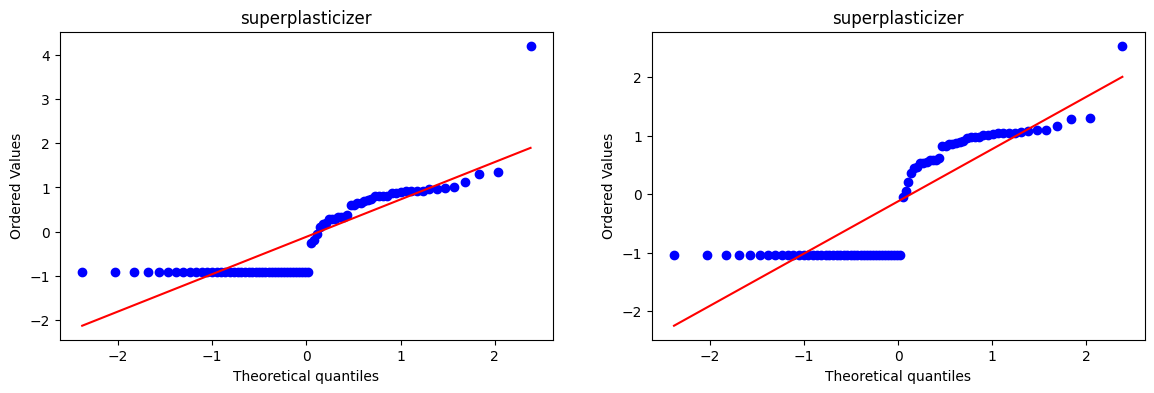

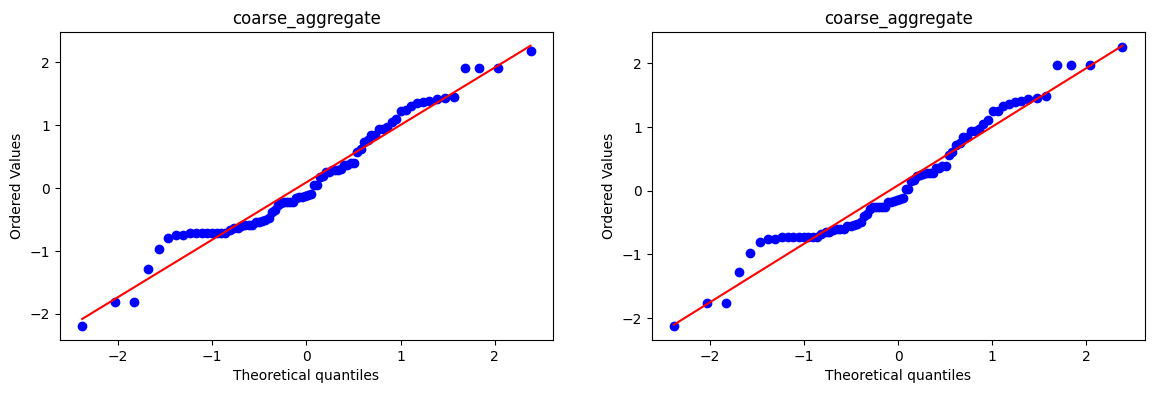

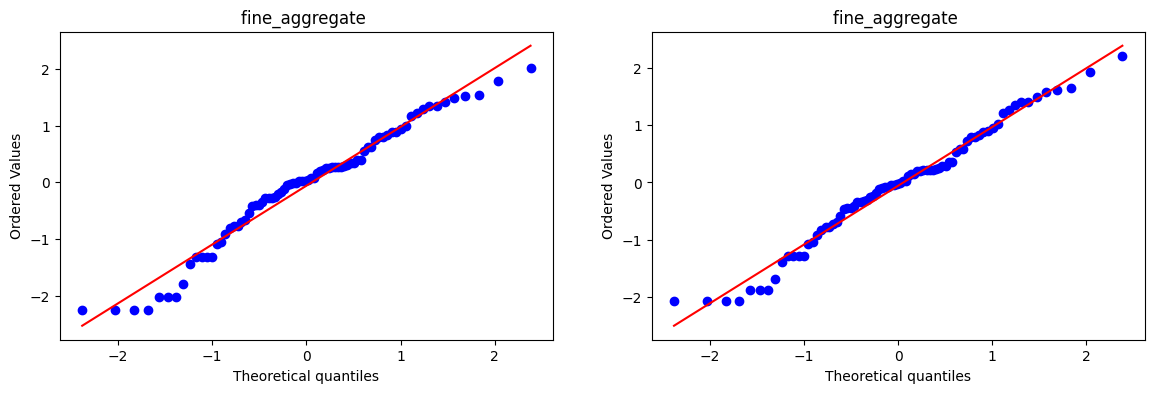

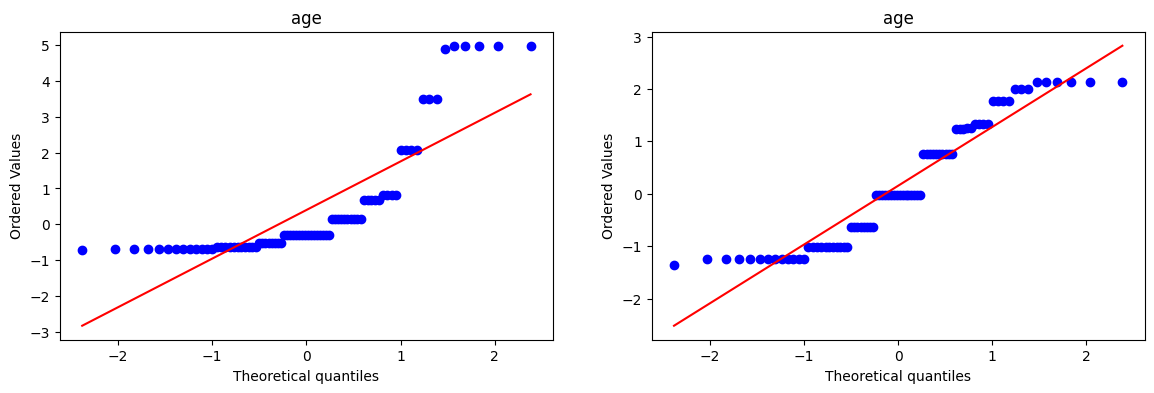

In [35]:
for x in X_train_scaled.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X_val_scaled[x],dist ='norm',plot=plt)
    plt.title(x)

    plt.subplot(122)
    stats.probplot(X_val_scaled_transformed[x],dist = 'norm' ,plot=plt)
    plt.title(x)
    
    plt.show()

##### Observation - I am using PowerTransformer from scikit-learn to make t=my features more closely follow a normal distribution and moreover stabilize their variance. Here the default transformation is **Yeo-Johnson transformation**


##### Reference - https://www.youtube.com/playlist?list=PLKnIA16_RmvYXWH_E6PuVLLHHTWXwwDN7

In [36]:
X_train_scaled_transformed_const = sm.add_constant(X_train_scaled_transformed)
X_train_scaled_transformed_const.head(5)


,const,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.0,-0.318925,-0.914044,1.046021,0.568224,0.179353,-0.507356,0.959932,-0.636549
1,1.0,0.747954,1.373625,-0.810307,-0.657921,1.046085,-0.563150,-0.336072,-0.019981
2,1.0,1.225845,0.861166,-0.810307,-1.194633,1.510198,-1.766453,1.375769,-1.242415
3,1.0,1.225845,0.861166,-0.810307,-1.194633,1.510198,-1.766453,1.375769,-1.242415
4,1.0,1.218582,-0.367698,1.324462,-0.513405,0.728443,-2.149215,-0.403677,-1.242415


In [37]:
X_val_scaled_transformed_const = sm.add_constant(X_val_scaled_transformed)
X_val_scaled_transformed_const.head(5)


,const,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.0,-1.108494,0.990195,-0.810307,1.083608,-1.048102,-0.369937,0.203074,-1.009089
1,1.0,-1.006185,1.729887,-0.810307,0.577105,-1.048102,-0.760057,-0.787803,-0.019981
2,1.0,-1.031312,1.378203,-0.810307,2.141845,-1.048102,-0.731079,-1.286438,1.996135
3,1.0,0.091982,-0.914044,-0.810307,0.577105,-1.048102,-0.977724,1.491862,-1.242415
4,1.0,-1.692493,1.462061,-0.810307,0.577105,-1.048102,0.842971,0.291223,2.125742


In [38]:
X_test_scaled_transformed_const = sm.add_constant(X_test_scaled_transformed)
X_test_scaled_transformed_const.head(5)


,const,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.0,-0.296766,-0.914044,-0.810307,0.264494,-1.048102,1.763037,0.002631,-1.009089
1,1.0,-0.296766,-0.914044,-0.810307,0.264494,-1.048102,1.763037,0.002631,-0.019981
2,1.0,0.551253,-0.914044,-0.810307,0.264494,-1.048102,1.027964,-0.357120,-0.019981
3,1.0,0.987461,-0.914044,-0.810307,0.577105,-1.048102,-0.625430,-0.310264,-1.242415
4,1.0,0.987461,-0.914044,-0.810307,0.577105,-1.048102,-0.625430,-0.310264,-0.019981


###### Just adding a constant in front of training and the validation and test data

# Training and Testing models

### Linear Regression using Statsmodels

In [39]:
y_train.reset_index(drop=True , inplace=True)
X_train_scaled_transformed_const.reset_index(drop=True,inplace=True)

In [40]:
model_sts = sm.OLS(y_train,X_train_scaled_transformed_const)

In [41]:
results  =  model_sts.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Material Strength   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     426.1
Date:                Tue, 05 Sep 2023   Prob (F-statistic):          2.38e-265
Time:                        23:33:37   Log-Likelihood:                -2458.5
No. Observations:                 720   AIC:                             4935.
Df Residuals:                     711   BIC:                             4976.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 36.5971      0.276    132.635      0.000      36.055      37.139
cement                 8.8623      0.689     12.868      0.000       7.510      10.214
blast_furnace_slag     5.7765      0.669      8.631      0.000       4.462       7.091
fly_ash                2.5928      0.641      4.043      0.000       1.334       3.852
water                 -5.2648      0.624     -8.433      0.000      -6.490      -4.039
superplasticizer       2.0143      0.623      3.231      0.001       0.790       3.238
coarse_aggregate      -0.3862      0.524     -0.737      0.461      -1.415       0.642
fine_aggregate        -1.8262      0.619     -2.950      0.003      -3.042      -0.611
age                   10.8582      0.282     38.478      0.000      10.304      11.412
==============================================================================
Omnibus:                       15.544   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.341
Skew:                           0.082   Prob(JB):                     7.01e-07
Kurtosis:                       3.958   Cond. No.                         7.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

      cooks_d  student_resid
0    0.000411       0.618095
1    0.003659       2.181803
2    0.003503      -1.490100
3    0.003503      -1.490100
4    0.003868      -1.209038
..        ...            ...
715  0.003377      -1.363384
716  0.002221       1.547047
717  0.000044       0.263978
718  0.000350       0.594324
719  0.000017      -0.065834

[720 rows x 2 columns]


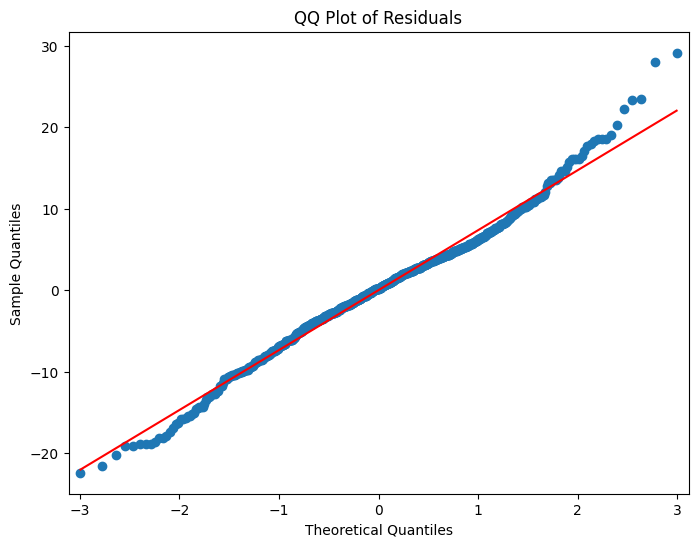

In [42]:
# Residual analysis
residuals = results.resid
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residuals, line='s', ax=ax)
plt.title("QQ Plot of Residuals")

# Feature importance
influence = OLSInfluence(results)
df_influence = influence.summary_frame()
print(df_influence[['cooks_d', 'student_resid']])

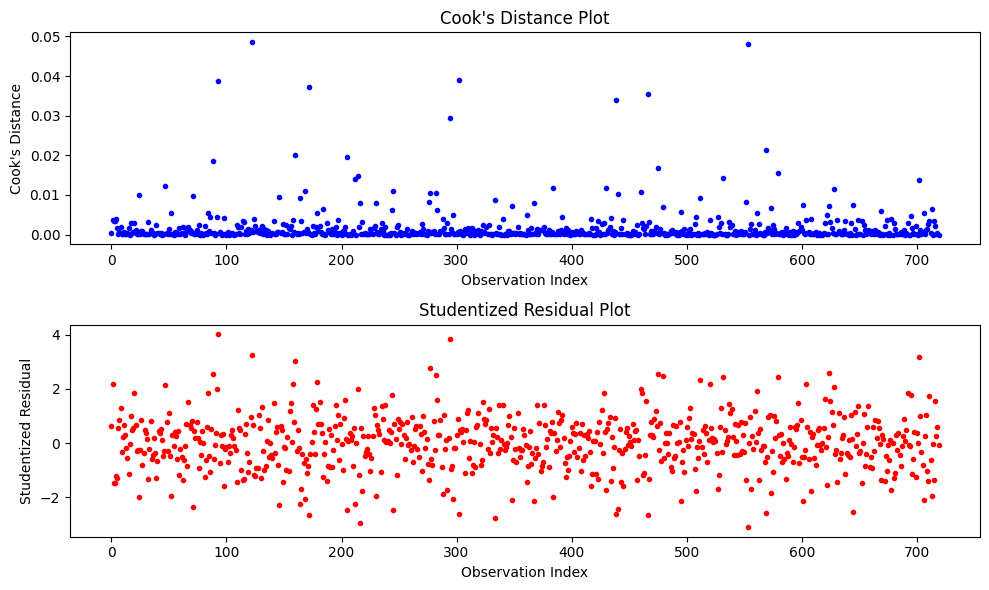

In [43]:
import matplotlib.pyplot as plt

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df_influence.index, df_influence['cooks_d'], 'bo', markersize=3)
plt.title("Cook's Distance Plot")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

# Plot studentized residuals
plt.subplot(2, 1, 2)
plt.plot(df_influence.index, df_influence['student_resid'], 'ro', markersize=3)
plt.title("Studentized Residual Plot")
plt.xlabel("Observation Index")
plt.ylabel("Studentized Residual")

plt.tight_layout()
plt.show()


##### Observation - Cook's Distance Plot:

The majority of data points have low Cook's distance values, concentrated in the range of 0.00 to 0.01. This indicates that most data points have a minimal influence on the regression model, and removing them would not significantly affect the model's coefficients or predictions.

There are some data points with Cook's distance values in the range of 0.001 to 0.05. These points may have a moderate influence on the model. While not extreme outliers, they still contribute somewhat to the overall fit of the model.

Studentized Residual Plot:

The studentized residuals are scattered across a wider range, from approximately -2.5 to 4.0. This indicates variations in the discrepancies between observed and predicted values across different data points.

A substantial portion of data points falls within the range of -0.5 to 1.0, which suggests that many observations have residuals close to zero or moderately close to zero. These are data points where the model predictions are reasonably accurate. 

In [44]:
y_pred_OLS = results.predict(X_val_scaled_transformed_const)
r2_score(y_pred_OLS,y_val)

0.6922422634464596

### Linear Regression 


In [45]:
model_linear = LinearRegression()
model_linear.fit(X_train_scaled_transformed_const,y_train)

LinearRegression()

In [46]:
y_pred = model_linear.predict(X_val_scaled_transformed_const)

r2_score(y_pred,y_val)

0.6922422634464597

In [47]:
# Using cross validation
pt1 = PowerTransformer()

X_transformed = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.7583765036323408

In [48]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define hyperparameters and their possible values
param_grid = {
    'fit_intercept': [True, False],  # Include or exclude the intercept term
}

# Step 2: Create a grid search object
grid_search = GridSearchCV(LinearRegression(), param_grid, cv=10, scoring='r2')

# Step 3: Fit the grid search on your training data
grid_search.fit(X_train_scaled_transformed_const, y_train)

# Step 4: Access the best hyperparameters and best model
best_params = grid_search.best_params_
best_model_linearregression = grid_search.best_estimator_


# Print the best hyperparameters and best R-squared score
print("Best Hyperparameters:", best_params)
print("Best R-squared Score:", grid_search.best_score_)

Best Hyperparameters: {'fit_intercept': True}
Best R-squared Score: 0.8191728347485979


In [49]:
best_model_linearregression

LinearRegression()

##### Here is my best LinearRegression model

### Normal Equation

In [50]:
X_T = X_train_scaled_transformed_const.T
X_TX = X_T.dot(X_train_scaled_transformed_const)
X_TY = X_T.dot(y_train)
X_TX_inv = np.linalg.inv(X_TX)


x_hat_normal = X_TX_inv.dot(X_TY)

intercept = x_hat_normal[0]
coefficients = x_hat_normal[1:]

# Print the intercept and coefficients
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 36.59713888888889
Coefficients: [ 8.86230181  5.7764733   2.59282468 -5.26479051  2.01431133 -0.38619447
 -1.82619508 10.85818425]


In [51]:
y_pred_normal = X_val_scaled_transformed_const @ x_hat_normal 

r2_score(y_val,y_pred_normal)

0.7579079906669554

##### We are actually getting a standard result from normal equation

### SVD

In [52]:
U , S , VT = np.linalg.svd(X_train_scaled_transformed_const,full_matrices=0)
x_hat = VT.T @ np.linalg.inv(np.diag(S))@ U.T @ y_train


In [53]:
y_pred_SVD = X_val_scaled_transformed_const @ x_hat 

r2_score(y_val,y_pred_SVD)

0.7579079906669552

##### Observation - Getting the same result as before

##### Reference - https://www.youtube.com/playlist?list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv

### Gradient Descent

In [54]:
class StochasticGradientDecent:
    
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.coefficients = None
        self.bias = None
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def fit(self, X_train, y_train):
        self.bias = 0
        self.coefficients = np.ones(X_train.shape[1])
        
        for epoch in range(self.num_epochs):
            for _ in range(X_train.shape[0]):
                random_idx = np.random.randint(0, X_train.shape[0])
                print(random_idx)
                
                y_pred = np.dot(X_train[random_idx], self.coefficients) + self.bias
                
                bias_gradient = -2 * (y_train[random_idx] - y_pred)
                self.bias -= self.learning_rate * bias_gradient
                
                coefficients_gradient = -2 * np.dot((y_train[random_idx] - y_pred), X_train[random_idx])
                self.coefficients -= self.learning_rate * coefficients_gradient
            
        print("Trained coefficients:", self.coefficients)
        print("Trained bias:", self.bias)
            
    def predict(self, X_test):
        return np.dot(X_test, self.coefficients) + self.bias


##### Reference - https://www.youtube.com/watch?v=Jyo53pAyVAM

In [55]:
sgd = StochasticGradientDecent(learning_rate=0.01,num_epochs=100)

In [56]:
sgd.fit(X_train=X_train_scaled_transformed_const.values,y_train=y_train.values)

339
675
652
389
479
360
557
495
651
100
456
562
530
199
240
109
269
682
635
332
100
36
580
447
185
360
436
562
540
409
579
632
457
553
682
181
654
567
341
688
430
457
709
83
687
702
365
61
245
508
455
451
362
224
295
69
192
47
624
161
530
632
278
201
120
11
199
175
635
530
571
441
215
351
613
468
648
213
441
228
666
579
162
358
567
460
673
99
620
305
209
214
635
627
661
44
81
415
210
435
637
611
149
401
47
314
527
636
458
552
414
236
695
23
613
449
568
618
551
325
678
462
88
561
486
538
678
651
325
531
261
647
157
78
28
204
343
616
644
195
199
91
321
533
697
255
676
81
38
590
394
642
220
228
425
347
407
549
129
624
275
447
310
201
286
35
579
323
297
502
37
456
518
443
118
463
393
583
241
356
426
553
183
595
366
183
88
388
336
106
164
681
541
231
459
524
413
582
119
340
579
512
613
32
100
523
641
66
521
540
120
437
355
388
65
275
691
324
170
631
378
287
467
11
77
372
259
177
358
127
679
168
391
177
317
62
356
108
534
695
684
63
555
604
123
656
401
622
392
40
513
279
180
204
597
329
440


446
324
101
366
64
519
574
429
372
322
32
40
78
189
21
226
49
181
552
515
621
481
572
123
107
137
319
616
302
447
592
614
567
594
519
714
697
458
540
211
617
65
245
515
175
356
392
361
169
175
297
463
557
49
718
390
674
112
622
515
134
622
161
640
657
634
214
391
464
352
300
573
217
127
415
707
553
107
145
526
400
395
360
249
128
152
30
71
332
469
714
14
507
133
54
14
345
627
490
85
166
504
335
607
142
233
474
103
445
37
513
243
143
221
171
537
171
694
618
81
689
219
431
130
532
159
389
604
480
462
221
697
345
292
640
416
404
412
716
438
677
395
379
705
342
472
583
424
184
235
471
549
351
364
148
124
125
115
275
558
157
293
265
507
441
345
685
646
600
572
631
508
370
567
409
393
61
134
640
84
73
247
131
655
280
563
184
711
110
396
132
165
267
572
82
647
303
151
683
303
452
717
137
431
271
581
464
62
149
143
225
470
545
638
700
601
52
314
714
93
26
381
471
262
223
145
685
358
179
146
398
37
101
658
265
277
359
696
591
453
406
466
255
250
634
618
688
617
156
469
197
88
147
276
214
376
48

649
197
697
310
462
594
646
378
95
338
315
674
290
0
357
711
157
274
694
523
646
51
339
238
63
598
129
98
38
382
211
208
9
252
227
83
648
86
282
104
57
694
565
183
140
462
50
228
403
522
558
580
398
441
184
575
540
126
661
639
446
131
62
346
237
298
484
91
426
255
127
355
126
642
481
675
445
718
32
32
160
231
346
18
717
537
95
173
45
411
595
294
41
274
426
361
62
429
212
592
95
377
512
485
416
221
363
32
337
360
641
248
249
197
692
113
535
224
369
387
149
30
354
538
464
443
244
593
77
85
155
206
689
67
393
590
171
279
183
445
108
215
212
261
114
50
288
534
313
187
688
642
210
324
393
446
562
8
239
413
579
392
250
262
303
512
204
224
124
83
222
324
161
697
451
2
423
537
314
536
242
327
522
247
554
376
197
333
702
499
497
142
483
494
318
696
599
701
297
52
618
292
544
329
602
404
613
653
129
425
336
528
115
515
407
518
531
425
403
43
559
307
709
138
238
440
378
358
148
206
291
432
326
185
424
686
144
2
486
140
343
154
678
361
354
426
292
702
674
469
213
166
420
277
341
373
40
340
240
82


382
109
650
667
703
354
469
312
594
708
288
200
644
118
144
390
179
548
351
12
15
674
683
135
176
7
665
708
174
234
373
659
510
508
210
443
372
625
365
64
303
543
376
296
412
252
591
637
712
523
430
356
227
661
527
440
354
196
252
27
84
562
472
132
618
200
73
142
201
664
515
135
180
6
16
211
680
162
345
616
316
661
190
219
191
375
244
200
40
444
67
263
116
650
409
668
87
656
445
431
392
86
409
460
90
675
661
573
149
116
230
14
417
100
185
524
511
431
285
322
547
680
63
680
184
379
104
251
573
556
268
509
191
455
263
537
448
112
409
4
396
45
696
364
687
651
58
342
604
500
81
536
508
428
637
54
422
503
484
26
640
678
110
75
166
305
64
36
46
438
363
554
331
207
80
359
346
699
5
329
555
169
614
576
11
366
364
235
371
361
222
609
385
541
307
645
239
448
280
179
658
78
70
223
253
470
500
294
260
263
499
94
79
279
98
100
238
69
7
215
346
640
393
255
62
502
248
289
361
522
261
487
17
518
1
254
58
10
148
643
477
555
448
518
572
413
121
649
365
113
628
519
582
245
401
114
264
516
566
474
157
460

274
442
274
31
267
117
355
640
718
409
375
264
170
560
584
707
660
436
299
282
545
42
345
136
364
72
29
592
394
699
576
16
213
309
46
268
262
564
307
442
603
96
520
664
190
476
194
275
580
409
696
76
704
426
150
224
241
575
220
683
597
432
351
319
237
499
330
133
707
516
653
149
181
472
248
161
682
259
559
406
271
146
521
443
667
196
9
264
593
265
158
470
10
86
162
472
453
255
85
163
609
40
99
609
502
298
478
73
469
100
307
660
386
486
192
51
23
441
156
190
556
204
348
326
689
537
137
333
103
143
84
378
207
270
229
203
85
383
224
622
431
612
514
645
538
354
708
23
458
634
313
148
663
387
542
150
528
200
626
2
148
65
455
456
516
289
163
301
200
502
427
257
650
368
5
500
140
78
80
273
694
512
339
210
134
644
369
665
538
703
378
171
56
0
66
228
228
712
428
471
127
614
192
470
184
75
556
170
582
499
393
62
698
347
425
265
35
144
668
227
560
441
362
621
652
89
292
602
498
312
282
128
92
673
545
281
535
208
153
684
215
390
275
332
368
490
510
335
343
694
153
402
43
237
532
171
342
80
536
94


302
411
549
445
352
314
717
598
448
530
139
481
107
423
302
481
140
690
639
157
282
160
445
699
72
499
213
513
231
554
475
321
630
461
230
174
158
271
478
43
650
189
133
358
610
705
277
216
713
22
386
117
673
617
596
304
311
410
226
604
96
189
563
131
422
335
501
506
566
582
513
215
277
705
149
440
389
441
90
331
25
158
141
241
496
371
84
681
600
154
341
423
489
181
372
689
64
688
212
662
583
401
523
567
565
543
688
539
683
319
401
688
405
172
197
662
213
109
134
596
71
641
644
610
657
647
260
359
239
663
98
25
314
296
234
97
680
710
425
669
662
654
198
332
538
458
71
680
4
577
629
62
425
257
105
528
423
265
240
432
549
238
327
112
349
501
135
191
649
265
495
598
512
667
264
44
125
356
249
528
308
240
509
208
210
719
678
283
386
465
80
142
483
401
74
359
273
391
336
346
562
99
510
567
271
198
250
508
217
598
625
466
272
239
114
153
625
618
512
165
327
618
38
407
669
203
259
334
677
461
475
591
291
132
387
713
243
484
103
175
150
369
199
657
581
370
339
650
562
477
109
418
504
457
574
5

197
527
345
579
545
113
285
260
333
441
374
330
455
604
519
349
694
210
679
383
164
668
337
635
679
329
580
539
68
79
31
625
389
181
377
10
595
269
116
632
646
493
589
153
389
161
647
392
482
516
301
478
546
390
434
73
89
306
172
273
254
386
455
457
535
195
299
71
146
149
664
15
682
173
311
636
719
699
92
90
52
403
577
645
287
565
52
117
341
148
384
277
183
324
115
88
60
498
465
602
22
380
435
436
578
91
604
503
504
515
352
552
61
310
702
193
257
561
473
315
405
376
267
344
439
479
416
139
297
393
516
550
49
0
147
65
574
181
286
679
441
574
410
344
551
149
20
489
408
600
107
436
79
225
326
663
711
557
598
150
514
247
705
85
646
248
65
180
409
256
291
166
85
137
456
603
568
440
384
688
690
139
557
166
257
548
689
80
68
594
109
207
156
20
159
37
367
651
206
665
606
402
105
377
547
578
597
234
602
383
130
142
570
359
578
616
264
29
152
304
651
354
386
504
378
388
42
388
405
380
241
359
396
149
252
434
10
153
168
374
513
351
246
374
121
117
147
440
676
622
22
542
570
227
653
566
252
214
51

568
511
517
407
71
449
188
149
267
483
572
71
304
555
272
128
66
109
616
683
250
474
277
478
66
701
580
285
201
613
351
529
714
453
65
332
568
475
437
135
698
96
301
424
585
158
352
317
432
473
20
552
224
534
263
322
226
699
42
361
230
12
380
582
90
35
425
224
564
129
275
471
72
355
18
178
694
260
343
401
26
455
271
108
626
12
349
300
330
462
87
92
249
515
603
329
198
55
361
92
430
198
232
217
308
464
1
712
132
59
616
553
401
53
57
681
319
536
567
255
122
442
403
42
529
686
127
346
664
214
601
127
281
7
246
31
185
539
319
514
614
115
32
191
417
256
276
602
488
77
416
436
455
12
228
699
72
551
166
713
62
520
178
189
9
78
84
528
235
350
457
604
417
32
502
147
664
62
637
496
169
591
110
564
469
595
184
607
217
19
176
171
711
395
680
208
48
214
45
279
330
21
171
431
213
4
206
624
619
538
435
454
582
238
357
181
372
19
183
648
403
486
443
608
216
436
73
303
585
370
353
422
126
519
598
133
138
188
504
186
340
542
162
251
184
458
278
146
146
187
303
659
534
632
507
365
501
309
517
446
531
223

571
265
656
638
79
257
714
611
404
369
113
466
219
545
389
571
473
121
48
667
58
396
294
370
557
167
367
231
575
434
256
133
466
273
643
283
46
431
488
175
599
496
534
360
401
552
8
444
368
200
35
5
365
370
478
554
424
256
362
441
347
56
600
229
232
694
324
343
152
540
605
74
283
301
441
219
294
157
238
100
598
328
617
294
217
177
253
407
41
8
296
121
282
269
541
324
525
189
161
546
657
379
310
78
550
86
445
599
304
298
163
299
21
393
3
497
230
674
677
488
117
105
591
410
218
149
568
510
199
345
682
526
415
273
94
453
622
359
458
21
182
498
215
77
263
576
456
412
209
209
178
93
484
526
635
670
250
455
589
191
611
501
431
418
714
550
571
203
329
679
130
371
166
441
290
488
183
276
629
655
589
421
150
194
212
458
652
54
553
487
362
699
328
457
532
172
479
663
53
113
156
27
672
28
18
577
233
269
269
166
467
541
167
714
33
538
121
416
182
227
47
19
98
152
604
409
688
480
250
617
683
558
704
532
268
688
524
638
429
238
439
623
473
628
26
138
384
249
270
236
200
458
495
464
446
167
332
535
2

In [57]:
y_pred_SGD = sgd.predict(X_val_scaled_transformed_const.values)
r2_score(y_pred_SGD,y_val)

0.6933035999701709

In [58]:
class BatchGradientDescent:
    
    def __init__(self, learning_rate=0.01, num_epochs=100):
        self.coefficients = None
        self.bias = None
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
    def fit(self, X_train, y_train):
        self.bias = 0
        self.coefficients = np.ones(X_train.shape[1])
        
        for epoch in range(self.num_epochs):
            # Calculate predictions for the entire dataset
            y_pred = np.dot(X_train, self.coefficients) + self.bias
            
            # Calculate gradients for bias and coefficients
            bias_gradient = -2 * np.mean(y_train - y_pred)
            coefficients_gradient = -2 * np.dot(X_train.T, (y_train - y_pred)) / len(y_train)
            
            # Update bias and coefficients using the gradients
            self.bias -= self.learning_rate * bias_gradient
            self.coefficients -= self.learning_rate * coefficients_gradient
            
        print("Trained coefficients:", self.coefficients)
        print("Trained bias:", self.bias)
            
    def predict(self, X_test):
        return np.dot(X_test, self.coefficients) + self.bias


In [59]:
BGD = BatchGradientDescent()

BGD.fit(X_train=X_train_scaled_transformed_const.values,y_train=y_train.values)

Trained coefficients: [18.49830189  6.643346    3.60885977  0.44187511 -2.79459004  5.29622273
 -0.74664156 -2.16616533  9.25307089]
Trained bias: 17.49830189378601


In [60]:
y_pred_BGD = BGD.predict(X_val_scaled_transformed_const.values)
r2_score(y_pred_BGD,y_val)

0.6155148261925925

##### Observation - Stochastic is performing far better than Batch and It's faster as well

##### Reference - https://www.youtube.com/watch?v=Jyo53pAyVAM

### GLM models

In [61]:
def find_best_glm_model(X_train, y_train, X_val, y_val):
    best_family = None
    best_link = None
    best_r2_score = -np.inf
    best_model = None

    families = [sm.families.Gaussian(), sm.families.Binomial(), sm.families.Poisson()]
    link_functions = ['identity', 'log', 'logit', 'probit', 'cloglog']

    for family, link_function in product(families, link_functions):
        link = getattr(sm.families.links, link_function)
#         model = sm.GLM(y_train, X_train, family=family(link()))
        model = sm.GLM(y_train, X_train, family=family, link=link)
        results = model.fit()
        y_pred = results.predict(X_val)
        r2 = r2_score(y_val, y_pred)

        if r2 > best_r2_score:
            best_r2_score = r2
            best_family = family
            best_link = link_function
            best_model = model
            

    return best_model ,best_family, best_link, best_r2_score

In [62]:
# Example usage:
best_model ,best_family, best_link, best_r2_score = find_best_glm_model(X_train_scaled_transformed_const, y_train, X_val_scaled_transformed_const, y_val)
print("Best Family:", best_family)
print("Best Link Function:", best_link)
print("Best R-squared Score:", best_r2_score)


Best Family: <statsmodels.genmod.families.family.Gaussian object at 0x000001B60B711030>
Best Link Function: identity
Best R-squared Score: 0.7579079906669552


C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['link']
  warnings.warn(msg, ValueWarning)
C:\Users\aritr\anaconda3\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encounte

##### Observation -> Best model performance is given my Gaussian with identity function

##### Reference -> https://chat.openai.com/

###  KNN

In [63]:
knn = KNeighborsRegressor(n_neighbors=2)

In [64]:
knn.fit(X_train_scaled_transformed_const,y_train)

KNeighborsRegressor(n_neighbors=2)

In [65]:
y_pred_knn =knn.predict(X_val_scaled_transformed_const)

print(f" r2_score : {r2_score(y_val,y_pred_knn)}")


 r2_score : 0.8245262939115809


In [66]:
r2_scores = []

for i in range(1,26):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled_transformed,y_train)
    y_pred = knn.predict(X_val_scaled_transformed)
    r2_scores.append(r2_score(y_val, y_pred))

In [67]:
max_r2_score = max(r2_scores)
max_r2_score_index = r2_scores.index(max_r2_score)

print("Maximum Score:", max_r2_score)
print("Index of Maximum Score:", max_r2_score_index)

Maximum Score: 0.8315562991776699
Index of Maximum Score: 3


In [68]:

param_grid = {
    'n_neighbors': [3, 5, 7,9,],
    'weights': ['uniform', 'distance']
}

# Create a KNN regressor
knn = KNeighborsRegressor()

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')

# Fit the grid search to your data
grid_search.fit(X_train_scaled_transformed_const, y_train)

# Get the best KNN model with the best hyperparameters
best_knn = grid_search.best_estimator_

# Use the best model to make predictions on the validation set
y_pred_knn = best_knn.predict(X_val_scaled_transformed_const)

# Calculate the R-squared score on the validation set
r2 = r2_score(y_val, y_pred_knn)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R-squared Score: {r2}")


Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
R-squared Score: 0.8281532173059403


##### Observation -> Best model performance is at n_neighbors = 7


### KNN with n_neighbors=7 giving me the best model

In [69]:
X_test_scaled_transformed_const.head(10)

,const,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,1.0,-0.296766,-0.914044,-0.810307,0.264494,-1.048102,1.763037,0.002631,-1.009089
1,1.0,-0.296766,-0.914044,-0.810307,0.264494,-1.048102,1.763037,0.002631,-0.019981
2,1.0,0.551253,-0.914044,-0.810307,0.264494,-1.048102,1.027964,-0.357120,-0.019981
3,1.0,0.987461,-0.914044,-0.810307,0.577105,-1.048102,-0.625430,-0.310264,-1.242415
4,1.0,0.987461,-0.914044,-0.810307,0.577105,-1.048102,-0.625430,-0.310264,-0.019981
5,1.0,0.987461,-0.914044,-0.810307,0.577105,-1.048102,-0.625430,-0.310264,1.240801
6,1.0,0.902410,-0.914044,-0.810307,0.264494,-1.048102,0.842971,-0.530269,-1.009089
7,1.0,0.902410,-0.914044,-0.810307,0.264494,-1.048102,0.842971,-0.530269,-0.019981
8,1.0,-0.296766,-0.914044,-0.810307,0.309391,-1.048102,1.763037,0.002631,-1.009089
9,1.0,-0.296766,-0.914044,-0.810307,0.264494,-1.048102,1.763037,0.002631,-0.019981


In [70]:
bestmodel_knn = KNeighborsRegressor(n_neighbors=7)

bestmodel_knn.fit(X_train_scaled_transformed_const,y_train)

KNeighborsRegressor(n_neighbors=7)

In [88]:
bestmodel_pred = bestmodel_knn.predict(X_test_scaled_transformed_const)

bestmodel_pred

array([12.87714286, 19.74      , 34.52428571, 19.14857143, 32.74714286,
       41.87714286, 22.62428571, 37.29714286, 12.87714286, 19.74      ,
       15.45857143, 26.86428571, 34.26857143, 33.12714286, 32.91857143,
       42.04428571, 42.04428571, 42.04428571, 48.29285714, 61.86428571,
       61.86428571, 19.46857143, 26.58      , 34.66714286, 27.77571429,
       37.29714286, 22.68857143, 42.94714286, 45.59285714, 55.30857143,
       47.39428571, 40.51571429, 39.02285714, 41.25      , 53.71      ,
       34.59428571, 49.91714286, 40.51714286, 41.25      , 31.17714286,
       65.15428571, 33.75428571, 38.11428571, 47.39428571, 55.56857143,
       59.46857143, 61.11428571, 55.80571429, 42.72142857, 29.50285714,
       39.89142857, 47.39428571, 31.69857143, 55.03142857, 55.50571429,
       65.15428571, 57.35142857, 41.58714286, 62.34      , 33.58714286,
       50.66714286, 52.54      , 34.35285714, 65.15428571, 43.32142857,
       42.72142857, 41.70142857, 48.56285714, 55.80571429, 46.51

In [72]:
# Create a DataFrame with the predictions
predictions_df = pd.DataFrame({'Predictions': bestmodel_pred})

# Save the predictions to a CSV file without a header
predictions_df.to_csv('test_predictions.csv', header=False, index=False)

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [81]:
y_test = pd.read_csv('concrete_data_Solution.csv',header=None)
y_test

,0
0,13.71
1,19.69
2,31.65
3,19.11
4,39.58
...,...
225,44.28
226,31.18
227,23.70
228,32.77


In [87]:
y_test_values =y_test[0]
y_test_values.values

array([13.71, 19.69, 31.65, 19.11, 39.58, 48.79, 24.  , 37.42, 11.47,
       19.69, 14.99, 27.92, 34.68, 37.33, 38.11, 33.8 , 42.42, 48.4 ,
       55.94, 58.78, 67.11, 20.77, 25.18, 29.59, 21.75, 39.09, 24.39,
       50.51, 74.99, 37.17, 33.76, 16.5 , 19.99, 36.35, 33.69, 15.42,
       33.42, 39.05, 27.68, 26.86, 45.3 , 30.12, 15.57, 44.61, 53.52,
       57.21, 65.91, 52.82, 33.4 , 18.03, 37.36, 32.84, 42.64, 40.06,
       41.94, 61.23, 40.87, 33.3 , 52.42, 15.09, 38.46, 37.26, 35.23,
       42.13, 31.87, 41.54, 39.45, 37.91, 44.28, 31.18, 23.69, 32.76,
       32.4 , 28.63, 36.8 , 18.28, 33.06, 31.42, 31.03, 44.39, 12.18,
       25.56, 36.44, 32.96, 23.84, 26.23, 17.95, 40.68, 19.01, 33.72,
        8.54, 13.46, 32.24, 23.52, 29.72, 49.77, 52.44, 40.93, 44.86,
       13.2 , 37.43, 29.87, 56.61, 12.46, 23.79, 13.29, 39.42, 46.23,
       44.52, 23.74, 26.14, 15.52, 43.57, 35.86, 41.05, 28.99, 46.24,
       26.92, 10.54, 25.1 , 29.07,  9.74, 33.8 , 39.84, 26.97, 27.23,
       30.65, 33.05,

In [90]:
# Calculate MSE
mse = mean_squared_error(y_test_values.values, bestmodel_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_values.values, bestmodel_pred)

# Calculate MAPE
mape = np.mean(np.abs((y_test_values.values - bestmodel_pred) / y_test_values.values)) * 100

# Print the results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Squared Error (MSE): 170.82580013309672
Mean Absolute Error (MAE): 11.065484472049688
Mean Absolute Percentage Error (MAPE): 44.02%
